#  Load and Explore the Data

In [1]:
import numpy as np
import pandas as pd
import sklearn

print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Scikit-Learn Version:", sklearn.__version__)


NumPy Version: 1.24.4
Pandas Version: 2.2.2
Scikit-Learn Version: 1.3.0


In [2]:
import pandas as pd
import numpy as np
data=pd.read_excel("Apples_stock price dataset.xlsx")
data

,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
0,2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
1,2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2,2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
3,2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
4,2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077
...,...,...,...,...,...,...,...,...
99995,2021-05-29 11:00:00,498.719645,507952.135502,200804.699078,3.824464,3.620599,3.323797,-0.161068
99996,2021-05-29 12:00:00,497.035439,507943.811002,200807.796915,1.753618,4.904652,2.723226,0.170113
99997,2021-05-29 13:00:00,501.968810,507932.520304,200809.969048,2.423570,4.993412,1.677252,-0.479887
99998,2021-05-29 14:00:00,498.905984,507942.053787,200807.345521,2.787465,5.861924,1.075077,0.401896


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   timestamp          100000 non-null  datetime64[ns]
 1   stock_price        99969 non-null   float64       
 2   nasdaq_index       99993 non-null   float64       
 3   sp500_index        99996 non-null   float64       
 4   inflation_rate     99992 non-null   float64       
 5   unemployment_rate  99996 non-null   float64       
 6   interest_rate      99998 non-null   float64       
 7   market_sentiment   99996 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 6.1 MB


In [4]:
data= data[(data["timestamp"].dt.hour >= 4) & (data["timestamp"].dt.hour <= 20)]
data = data[~data["timestamp"].dt.weekday.isin([5, 6])]  # Exclude Saturday (5) and Sunday (6)


In [5]:
data

,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
4,2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077
5,2010-01-01 05:00:00,99.022103,8011.832789,3004.510779,2.321292,4.095568,1.664753,-0.828119
6,2010-01-01 06:00:00,108.127409,8028.157784,3010.735533,2.626140,5.447153,2.995546,-0.813849
7,2010-01-01 07:00:00,104.107075,8027.722289,3015.504909,4.056720,3.377880,3.276263,0.002849
8,2010-01-01 08:00:00,97.961085,8029.541811,3020.187389,2.099831,4.815785,1.761161,-0.634609
...,...,...,...,...,...,...,...,...
99976,2021-05-28 16:00:00,488.004936,507912.456960,200756.680777,3.107003,3.830638,2.443950,-0.626843
99977,2021-05-28 17:00:00,501.413780,507914.215983,200770.582677,3.785128,6.567227,0.662596,-0.013764
99978,2021-05-28 18:00:00,492.627037,507927.121232,200775.369524,2.392459,6.589893,2.519469,0.207107
99979,2021-05-28 19:00:00,504.385488,507928.596882,200774.361821,3.168374,3.334340,1.567604,-0.379527


In [6]:
data.isna().sum()

timestamp             0
stock_price          18
nasdaq_index          4
sp500_index           3
inflation_rate        4
unemployment_rate     4
interest_rate         0
market_sentiment      0
dtype: int64

In [7]:
for column in data.columns:
    if data[column].dtype != 'O' and not np.issubdtype(data[column].dtype, np.datetime64):  
        data[column] = data[column].fillna(data[column].expanding().mean().shift(1))


In [8]:
data.isna().sum()

timestamp            0
stock_price          0
nasdaq_index         0
sp500_index          0
inflation_rate       0
unemployment_rate    0
interest_rate        0
market_sentiment     0
dtype: int64

# data visualizations 

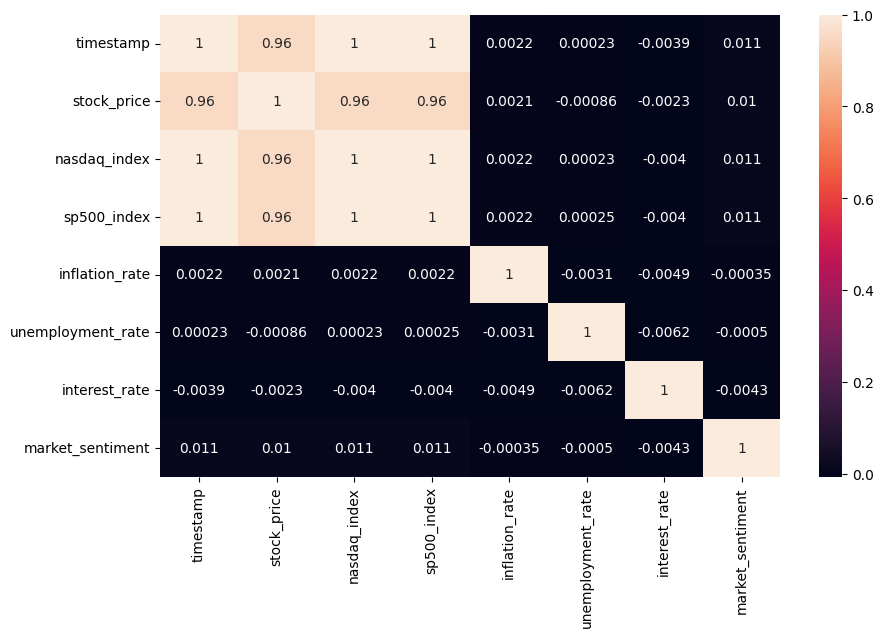

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(),annot=True)
plt.show()

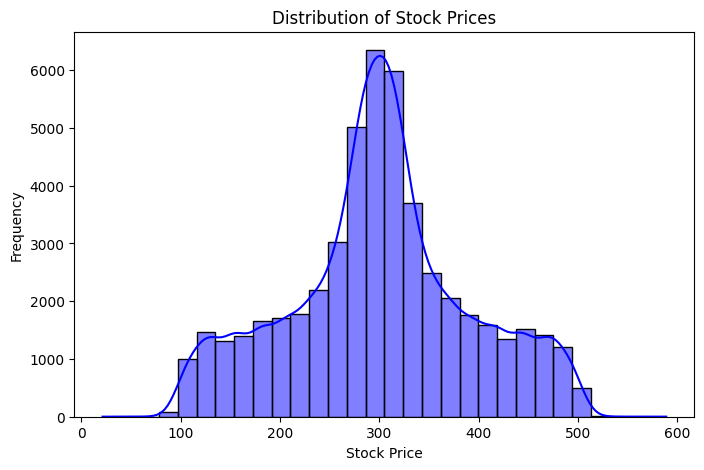

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(data["stock_price"], bins=30, kde=True, color="blue")
plt.xlabel("Stock Price")
plt.ylabel("Frequency")
plt.title("Distribution of Stock Prices")
plt.show()

shows normal distribution 

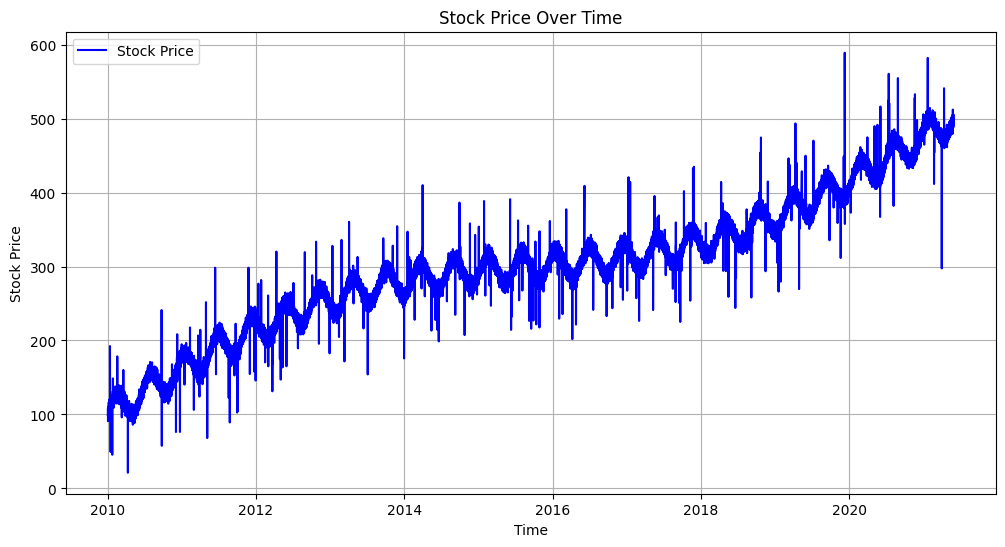

In [11]:

plt.figure(figsize=(12,6))
plt.plot(data['timestamp'], data["stock_price"], label="Stock Price", color='blue')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Over Time")
plt.legend()
plt.grid()
plt.show()


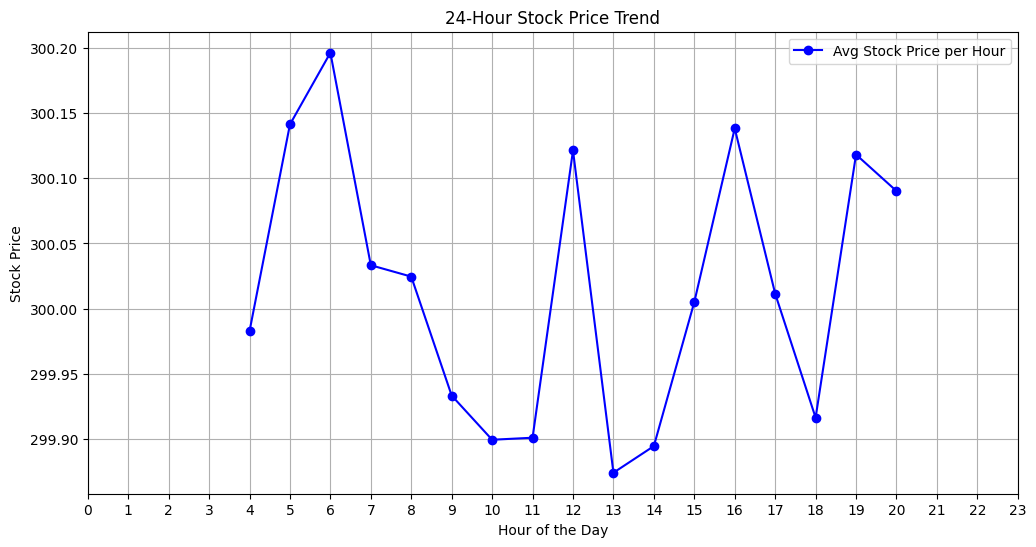

In [12]:

data['hour'] = data['timestamp'].dt.hour


data_hourly = data.groupby('hour')['stock_price'].mean()

# Plot the 24-hour trend
plt.figure(figsize=(12, 6))
plt.plot(data_hourly.index, data_hourly, marker='o', linestyle='-', color='b', label="Avg Stock Price per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Stock Price")
plt.title("24-Hour Stock Price Trend")
plt.xticks(range(24))  
plt.legend()
plt.grid()
plt.show()


# Exploring Monthly Stock Price 

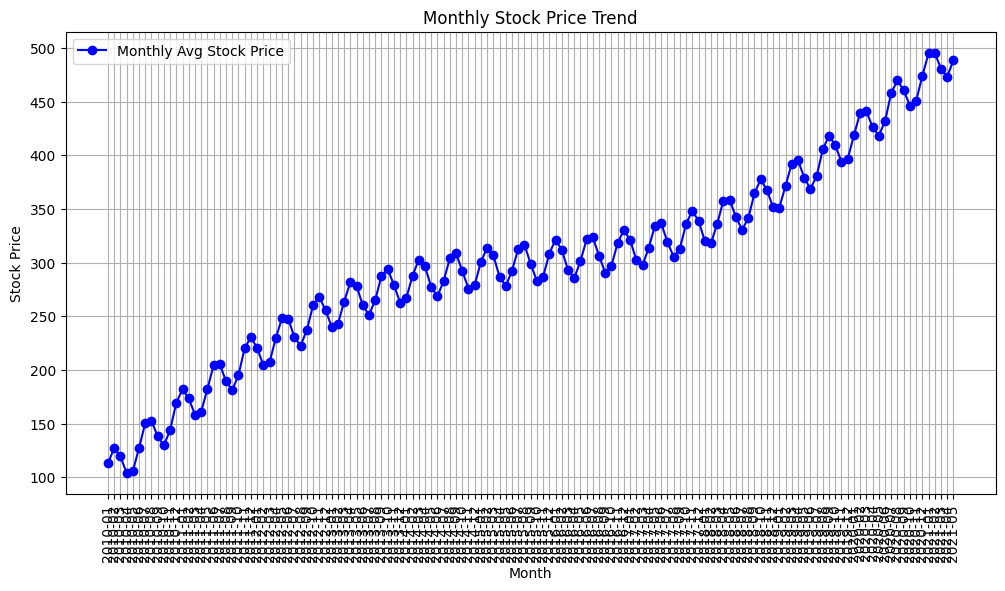

In [13]:
data['YearMonth'] = data['timestamp'].dt.to_period('M')
monthly_stock_price = data.groupby('YearMonth')['stock_price'].mean()


plt.figure(figsize=(12, 6))
plt.plot(monthly_stock_price.index.astype(str), monthly_stock_price, marker='o', linestyle='-', color='b', label='Monthly Avg Stock Price')
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Stock Price")
plt.title("Monthly Stock Price Trend")
plt.legend()
plt.grid(True)
plt.show()

this graph shows long term trend and seasonal trends

# Exploring yearly Stock Price

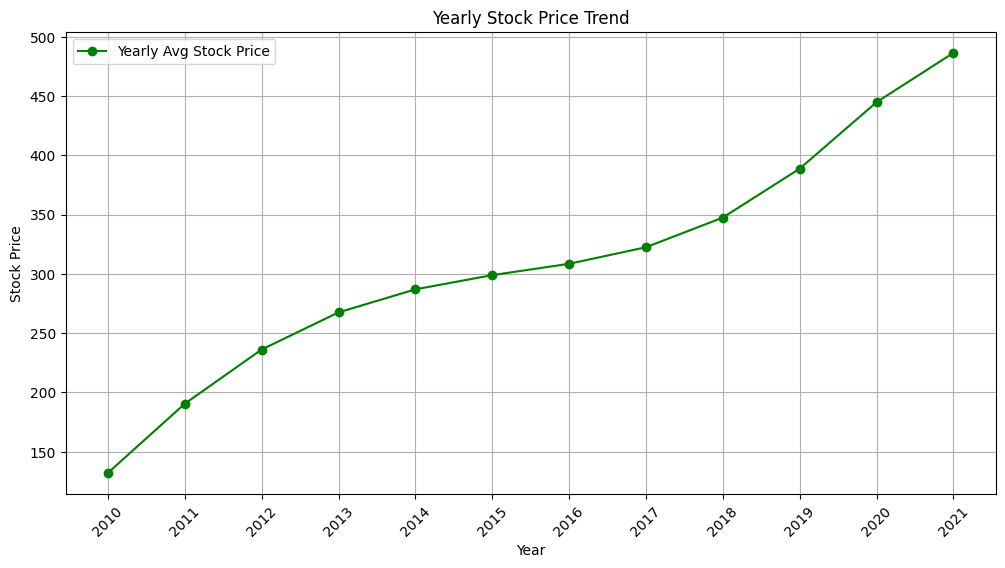

In [14]:
data['Year'] = data['timestamp'].dt.year
yearly_stock_price = data.groupby('Year')['stock_price'].mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_stock_price.index, yearly_stock_price, marker='o', linestyle='-', color='g', label='Yearly Avg Stock Price')
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.title("Yearly Stock Price Trend")
plt.xticks(yearly_stock_price.index, rotation=45) 
plt.legend()
plt.grid(True)
plt.show()

# scatter plot to know relation

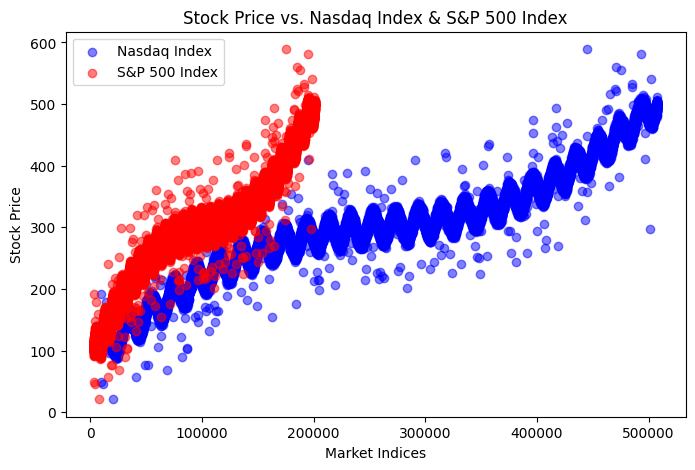

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(data["nasdaq_index"], data["stock_price"], color="blue", alpha=0.5, label="Nasdaq Index")
plt.scatter(data["sp500_index"], data["stock_price"], color="red", alpha=0.5, label="S&P 500 Index")

# Labels and title
plt.xlabel("Market Indices")
plt.ylabel("Stock Price")
plt.title("Stock Price vs. Nasdaq Index & S&P 500 Index")
plt.legend()
plt.show()

 stock price is positively correlated with overall market performance

# Autocorrelation Shows how past values influence the present.

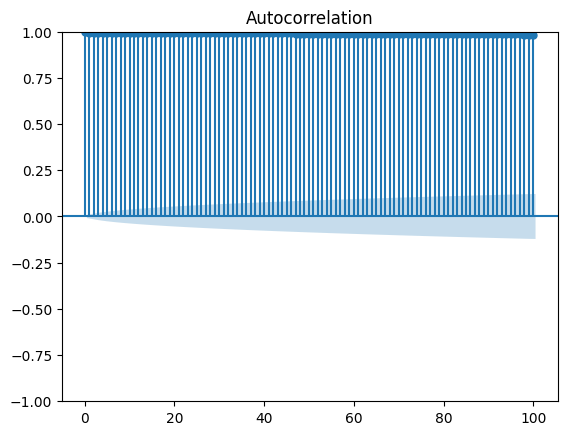

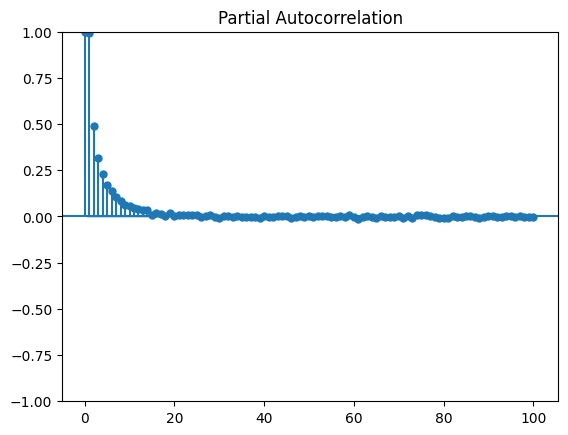

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data['stock_price'], lags=100)
plt.show()
plot_pacf(data['stock_price'], lags=100)
plt.show()



All bars are close to 1: This means that the past values are highly correlated with future values, even at large lags.

Slow decay: The correlation does not drop quickly, suggesting that the data has a strong trend or is non-stationary.

Shaded region: This represents the confidence interval. Since all bars are outside this region, the correlations are statistically significant.

# using boxplot to visualize outliers

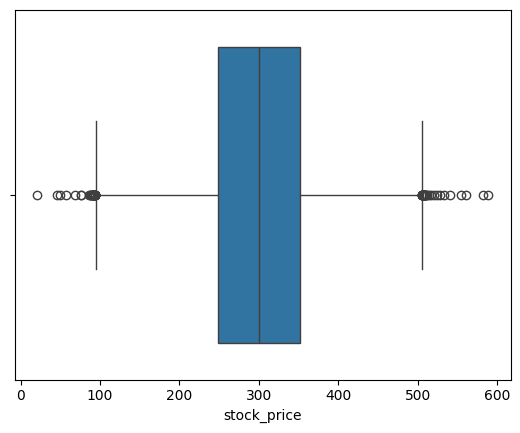

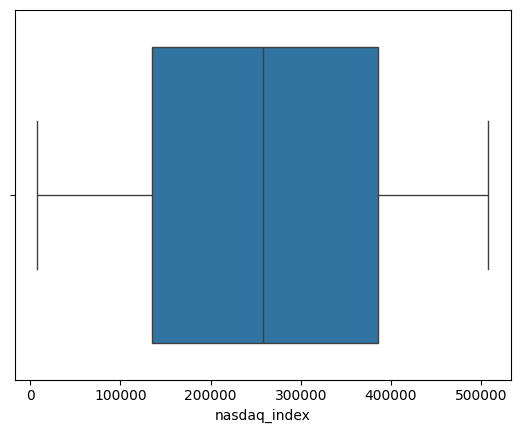

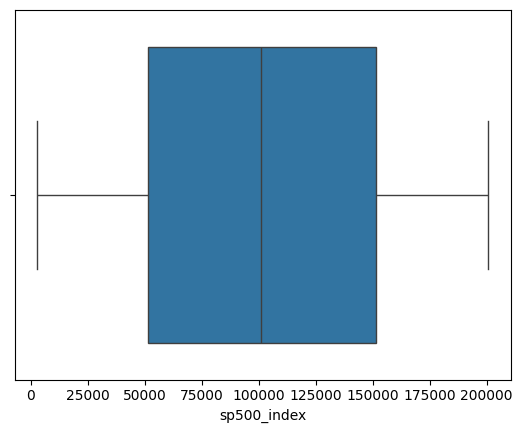

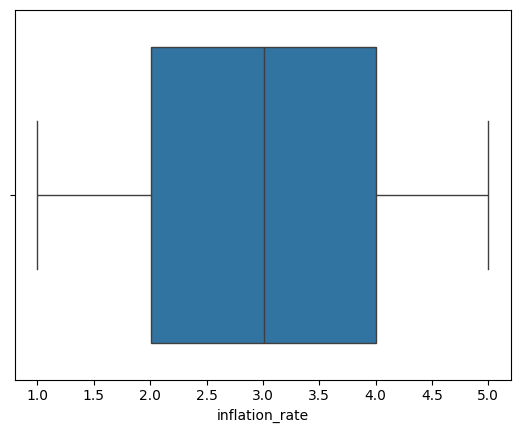

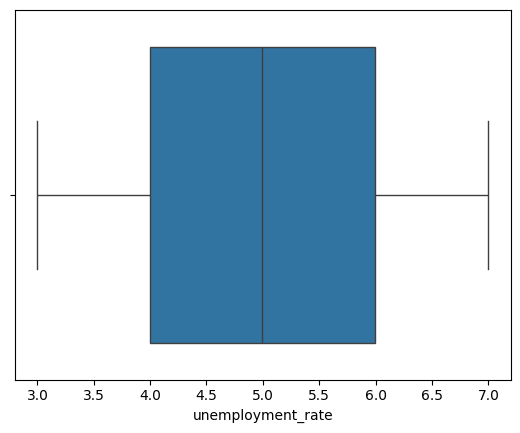

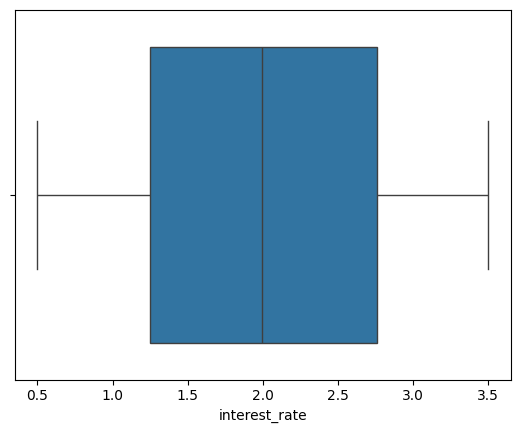

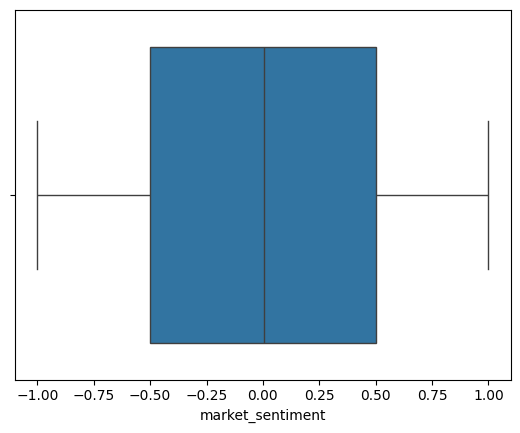

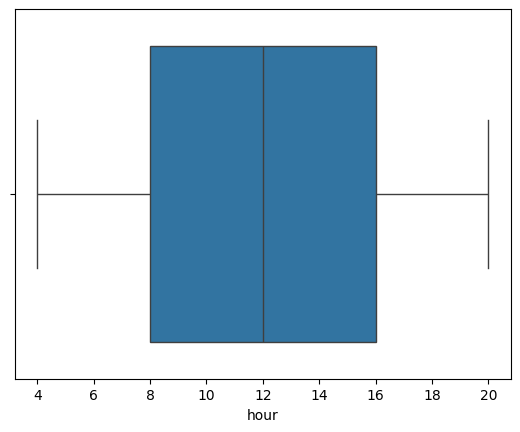

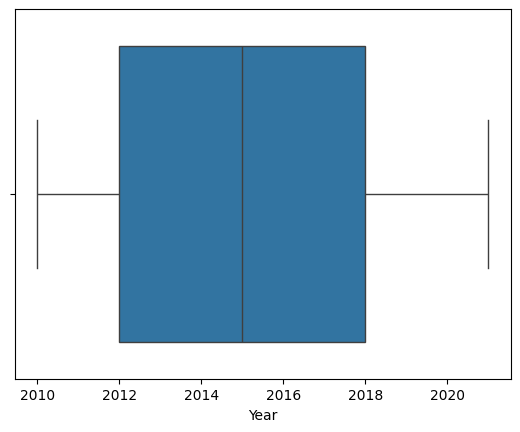

In [17]:
for column in data.select_dtypes(include=['number']).columns  :
    sns.boxplot(x=data[column])
    plt.show()

In [18]:
for column in data.select_dtypes(include=['number']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    print(f"Outliers in '{column}':")
    print(data.loc[outliers, [column]])  # Display only the outlier column
    print("-" * 50)
    data.loc[outliers, column] = data[column].rolling(window=24, min_periods=1, center=True).mean()#replacing the outliers


Outliers in 'stock_price':
       stock_price
13       90.934823
14       91.915186
19       93.670993
79       93.101864
321      49.274635
...            ...
97783   508.662528
98874   540.967791
99917   512.117088
99944   506.085044
99966   505.722816

[76 rows x 1 columns]
--------------------------------------------------
Outliers in 'nasdaq_index':
Empty DataFrame
Columns: [nasdaq_index]
Index: []
--------------------------------------------------
Outliers in 'sp500_index':
Empty DataFrame
Columns: [sp500_index]
Index: []
--------------------------------------------------
Outliers in 'inflation_rate':
Empty DataFrame
Columns: [inflation_rate]
Index: []
--------------------------------------------------
Outliers in 'unemployment_rate':
Empty DataFrame
Columns: [unemployment_rate]
Index: []
--------------------------------------------------
Outliers in 'interest_rate':
Empty DataFrame
Columns: [interest_rate]
Index: []
--------------------------------------------------
Outliers in 

# checking outliers after replacing 

In [19]:
for column in data.select_dtypes(include=['number']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    print(f"Outliers in '{column}':")
    print(data.loc[outliers, [column]])  # Display only the outlier column
    print("-" * 50)

Outliers in 'stock_price':
Empty DataFrame
Columns: [stock_price]
Index: []
--------------------------------------------------
Outliers in 'nasdaq_index':
Empty DataFrame
Columns: [nasdaq_index]
Index: []
--------------------------------------------------
Outliers in 'sp500_index':
Empty DataFrame
Columns: [sp500_index]
Index: []
--------------------------------------------------
Outliers in 'inflation_rate':
Empty DataFrame
Columns: [inflation_rate]
Index: []
--------------------------------------------------
Outliers in 'unemployment_rate':
Empty DataFrame
Columns: [unemployment_rate]
Index: []
--------------------------------------------------
Outliers in 'interest_rate':
Empty DataFrame
Columns: [interest_rate]
Index: []
--------------------------------------------------
Outliers in 'market_sentiment':
Empty DataFrame
Columns: [market_sentiment]
Index: []
--------------------------------------------------
Outliers in 'hour':
Empty DataFrame
Columns: [hour]
Index: []
---------------

In [20]:
data.drop(['hour','YearMonth','Year'],axis=1,inplace=True)

# making data stationary

In [21]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def make_stationary(data):
    for col in data.select_dtypes(include=['number']).columns:
        for i in range(1, 3):  # Try first and second differencing
            result = adfuller(data[col].dropna())  
            print(f"\nColumn: {col}\nADF Statistic: {result[0]}\np-value: {result[1]}")

            if result[1] < 0.05:
                print(f"Data is stationary after {i-1} differencing." if i == 1 else f"{col} has been transformed to stationary.")
                break

            print(f"Data is non-stationary (fail to reject H₀). Applying differencing to {col}...")
            data[col] = data[col].diff()
            data.dropna(inplace=True) 

        else:
            print(f"{col} is still non-stationary. Consider further transformations.")

    return data


data = make_stationary(data)



Column: stock_price
ADF Statistic: -0.4494855258189231
p-value: 0.9015028612641849
Data is non-stationary (fail to reject H₀). Applying differencing to stock_price...

Column: stock_price
ADF Statistic: -50.18911811656975
p-value: 0.0
stock_price has been transformed to stationary.

Column: nasdaq_index
ADF Statistic: -0.46858509157473716
p-value: 0.8980024918111846
Data is non-stationary (fail to reject H₀). Applying differencing to nasdaq_index...

Column: nasdaq_index
ADF Statistic: -49.98660989371082
p-value: 0.0
nasdaq_index has been transformed to stationary.

Column: sp500_index
ADF Statistic: 0.40516661084730216
p-value: 0.9816871291790965
Data is non-stationary (fail to reject H₀). Applying differencing to sp500_index...

Column: sp500_index
ADF Statistic: -48.40156484810056
p-value: 0.0
sp500_index has been transformed to stationary.

Column: inflation_rate
ADF Statistic: -226.0217565919995
p-value: 0.0
Data is stationary after 0 differencing.

Column: unemployment_rate
ADF 

In [22]:
data


,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
7,2010-01-01 07:00:00,-4.020334,-0.435494,4.769377,4.056720,3.377880,3.276263,0.002849
8,2010-01-01 08:00:00,-6.145990,1.819521,4.682479,2.099831,4.815785,1.761161,-0.634609
9,2010-01-01 09:00:00,5.098727,10.903607,3.754550,4.509695,4.716829,1.884053,-0.452717
10,2010-01-01 10:00:00,-4.991334,15.599850,4.281350,4.708331,4.913421,1.715299,0.774117
11,2010-01-01 11:00:00,0.026993,-7.833134,8.102469,4.074317,5.831791,2.032927,-0.368769
...,...,...,...,...,...,...,...,...
99976,2021-05-28 16:00:00,-12.820952,1.505754,9.570161,3.107003,3.830638,2.443950,-0.626843
99977,2021-05-28 17:00:00,13.408844,1.759023,13.901899,3.785128,6.567227,0.662596,-0.013764
99978,2021-05-28 18:00:00,-8.786743,12.905249,4.786848,2.392459,6.589893,2.519469,0.207107
99979,2021-05-28 19:00:00,11.758450,1.475651,-1.007703,3.168374,3.334340,1.567604,-0.379527


In [23]:
data.isna().sum()

timestamp            0
stock_price          0
nasdaq_index         0
sp500_index          0
inflation_rate       0
unemployment_rate    0
interest_rate        0
market_sentiment     0
dtype: int64

# Analyze ACF/PACF to determine (p, q) values.

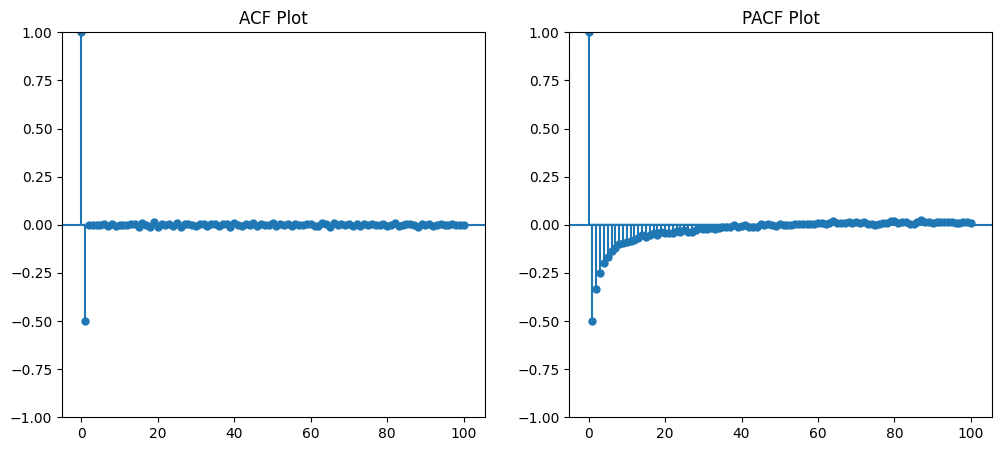

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

stock_prices = data['stock_price']


acf_values = acf(stock_prices, nlags=100)
pacf_values = pacf(stock_prices, nlags=100)

# Find first lag where values drop below 0.05
#acf_cutoff = np.where(np.abs(acf_values) < 0.05)[0][0] if any(np.abs(acf_values) < 0.05) else "No cutoff found"
#pacf_cutoff = np.where(np.abs(pacf_values) < 0.05)[0][0] if any(np.abs(pacf_values) < 0.05) else "No cutoff found"

# Print cut-off points
#print(f"ACF Cut-off at Lag: {acf_cutoff}")
#(f"PACF Cut-off at Lag: {pacf_cutoff}")

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(stock_prices, lags=100, ax=axes[0],alpha=0.05)
axes[0].set_title("ACF Plot")

plot_pacf(stock_prices, lags=100, ax=axes[1],alpha=0.05)
axes[1].set_title("PACF Plot")

plt.show()



Now that your data is stationary,  building an ARIMA model to predict future values because  seasonality is present 

p (AR order) = 1 or 2 because PACF shows significance at Lag 1 or 2

d (differencing) = 1 because  the data stationary

q (MA order) = 0 since the ACF plot had no strong spikes

In [25]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Set timestamp as index
data.set_index('timestamp', inplace=True)

In [26]:
data

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-01 07:00:00,-4.020334,-0.435494,4.769377,4.056720,3.377880,3.276263,0.002849
2010-01-01 08:00:00,-6.145990,1.819521,4.682479,2.099831,4.815785,1.761161,-0.634609
2010-01-01 09:00:00,5.098727,10.903607,3.754550,4.509695,4.716829,1.884053,-0.452717
2010-01-01 10:00:00,-4.991334,15.599850,4.281350,4.708331,4.913421,1.715299,0.774117
2010-01-01 11:00:00,0.026993,-7.833134,8.102469,4.074317,5.831791,2.032927,-0.368769
...,...,...,...,...,...,...,...
2021-05-28 16:00:00,-12.820952,1.505754,9.570161,3.107003,3.830638,2.443950,-0.626843
2021-05-28 17:00:00,13.408844,1.759023,13.901899,3.785128,6.567227,0.662596,-0.013764
2021-05-28 18:00:00,-8.786743,12.905249,4.786848,2.392459,6.589893,2.519469,0.207107


# ARIMA 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=51.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=337852.668, Time=0.79 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=314102.018, Time=1.76 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=24.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=337850.668, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=302328.708, Time=2.58 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=295337.777, Time=3.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=290612.484, Time=3.63 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=287084.057, Time=4.30 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=61.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=647.28 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=287082.057, Time=2.85 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=290610.484, Time=2.46 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=83.93 sec
 ARIMA(4,1,1)(0,0,0)[0]           

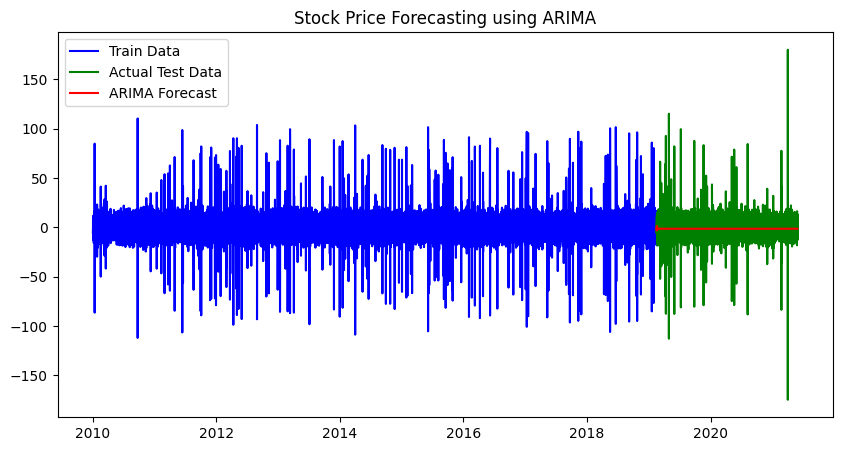

RMSE: 8.8597
MAE: 6.0029
R² Score: -0.0243


In [27]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings("ignore")

# Load Data
df = data[['stock_price']]  # Assuming 'data' is already loaded
df.index = pd.to_datetime(df.index)  # Ensure timestamp is in datetime format

# Split into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Automatically determine best (p, d, q) values
auto_arima_model = auto_arima(train, d=1, seasonal=False, trace=True, suppress_warnings=True)

# Get the best order (p, d, q)
p, d, q = auto_arima_model.order
print(f"Optimal (p, d, q): {p, d, q}")

# Fit ARIMA Model
arima_model = ARIMA(train, order=(p, d, q))
arima_results = arima_model.fit()

# Forecast on test data
forecast = arima_results.predict(start=len(train), end=len(train) + len(test) - 1)
forecast = forecast.to_numpy().reshape(-1, 1)  # Ensure proper shape alignment

# Align forecast index with test set
test = test.to_numpy().reshape(-1, 1)  # Ensure test has same shape as forecast

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(df.index[:train_size], train, label='Train Data', color='blue')
plt.plot(df.index[train_size:], test, label='Actual Test Data', color='green')
plt.plot(df.index[train_size:], forecast, label='ARIMA Forecast', color='red')
plt.legend()
plt.title('Stock Price Forecasting using ARIMA')
plt.show()

# Evaluate Model
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
r2 = r2_score(test, forecast)

# Print all metrics
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


In [28]:
df

,stock_price
timestamp,
2010-01-01 07:00:00,-4.020334
2010-01-01 08:00:00,-6.145990
2010-01-01 09:00:00,5.098727
2010-01-01 10:00:00,-4.991334
2010-01-01 11:00:00,0.026993
...,...
2021-05-28 16:00:00,-12.820952
2021-05-28 17:00:00,13.408844
2021-05-28 18:00:00,-8.786743


In [29]:
print(f"Length of Test: {len(test)}")
print(f"Length of Forecast: {len(forecast)}")


Length of Test: 10118
Length of Forecast: 10118


In [30]:
 data

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-01 07:00:00,-4.020334,-0.435494,4.769377,4.056720,3.377880,3.276263,0.002849
2010-01-01 08:00:00,-6.145990,1.819521,4.682479,2.099831,4.815785,1.761161,-0.634609
2010-01-01 09:00:00,5.098727,10.903607,3.754550,4.509695,4.716829,1.884053,-0.452717
2010-01-01 10:00:00,-4.991334,15.599850,4.281350,4.708331,4.913421,1.715299,0.774117
2010-01-01 11:00:00,0.026993,-7.833134,8.102469,4.074317,5.831791,2.032927,-0.368769
...,...,...,...,...,...,...,...
2021-05-28 16:00:00,-12.820952,1.505754,9.570161,3.107003,3.830638,2.443950,-0.626843
2021-05-28 17:00:00,13.408844,1.759023,13.901899,3.785128,6.567227,0.662596,-0.013764
2021-05-28 18:00:00,-8.786743,12.905249,4.786848,2.392459,6.589893,2.519469,0.207107


# random forest regressor

Mean Absolute Error: 4.9222
Root Mean Squared Error: 7.0998
Mean Squared Error: 50.4077
R² Score: 0.3422


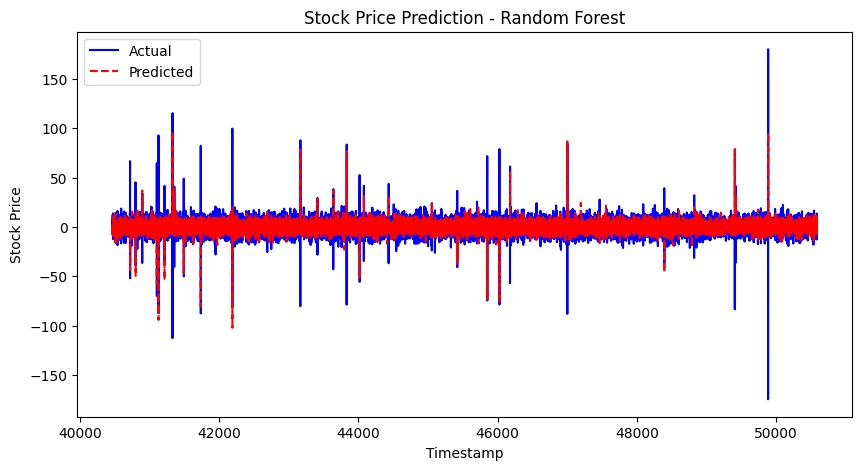

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
def create_lags(data, lags=3):
    data_lagged = data.copy()
    for lag in range(1, lags + 1):
        data_lagged[f"stock_price_lag{lag}"] = data["stock_price"].shift(lag)
    return data_lagged.fillna(0).reset_index(drop=True)

data_lagged = create_lags(data, lags=3)

# Define Features & Target
features = [col for col in data_lagged.columns if "lag" in col]
target = "stock_price"

X = data_lagged[features]
y = data_lagged[target]

# Ensure consistent indices
X, y = X.align(y, join='inner', axis=0)

# Train-Test Split
train_size = int(len(X) * 0.8)
X_train_rf, X_test_rf = X.iloc[:train_size], X.iloc[train_size:]
y_train_rf, y_test_rf = y.iloc[:train_size], y.iloc[train_size:]

# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train_rf)

# Make Predictions
y_pred_rf = rf.predict(X_test_rf)

# Evaluate Model
mae = mean_absolute_error(y_test_rf, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))
mse = mean_squared_error(y_test_rf, y_pred_rf)
r2 = r2_score(y_test_rf, y_pred_rf)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test_rf.index, y_test_rf, label="Actual", color="blue")
plt.plot(y_test_rf.index, y_pred_rf, label="Predicted", color="red", linestyle="dashed")
plt.title("Stock Price Prediction - Random Forest")
plt.xlabel("Timestamp")
plt.ylabel("Stock Price")
plt.legend()
plt.show()




# model performs well in stable conditions but struggles with extreme stock price changes.

# Xgboost

XGBoost Performance:
MAE: 4.7212
MSE: 49.7467
R² Score: 0.3508


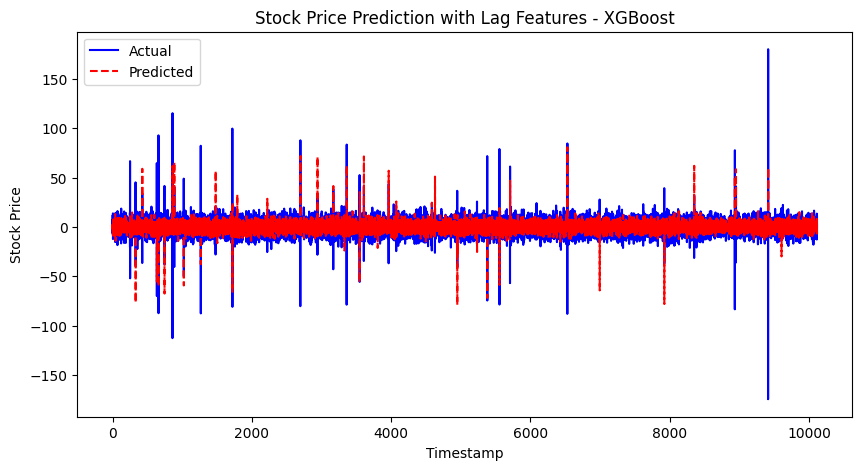

In [42]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to Create Lag Features
def create_lags(data, lags=3):
    data_lagged = data.copy()
    for lag in range(1, lags + 1):
        data_lagged[f"stock_price_lag{lag}"] = data["stock_price"].shift(lag)
    return data_lagged.fillna(0).reset_index(drop=True)  # Fill NaN values with 0

# Apply Lag Feature Function
data_lagged = create_lags(data, lags=3)

# Define Features & Target
features_xgb = [col for col in data_lagged.columns if "lag" in col]  # Use lag columns
target_xgb = "stock_price"

X_xgb = data_lagged[features_xgb]
y_xgb = data_lagged[target_xgb]

# Train-Test Split (Time-Based)
train_size = int(len(X_xgb) * 0.8)
X_train_xgb, X_test_xgb = X_xgb.iloc[:train_size], X_xgb.iloc[train_size:]
y_train_xgb, y_test_xgb = y_xgb.iloc[:train_size], y_xgb.iloc[train_size:]

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Make Predictions
xgb_preds = xgb_model.predict(X_test_xgb)

# Evaluate Model
mae_xgb = mean_absolute_error(y_test_xgb, xgb_preds)
mse_xgb = mean_squared_error(y_test_xgb, xgb_preds)
r2_xgb = r2_score(y_test_xgb, xgb_preds)

print("XGBoost Performance:")
print(f"MAE: {mae_xgb:.4f}")
print(f"MSE: {mse_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10,5))
plt.plot(y_test_xgb.values, label="Actual", color='blue')
plt.plot(xgb_preds, label="Predicted", linestyle='dashed', color='red')
plt.legend()
plt.title("Stock Price Prediction with Lag Features - XGBoost")
plt.xlabel("Timestamp")
plt.ylabel("Stock Price")
plt.show()


# lightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 40471, number of used features: 3
[LightGBM] [Info] Start training from score 0.006454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

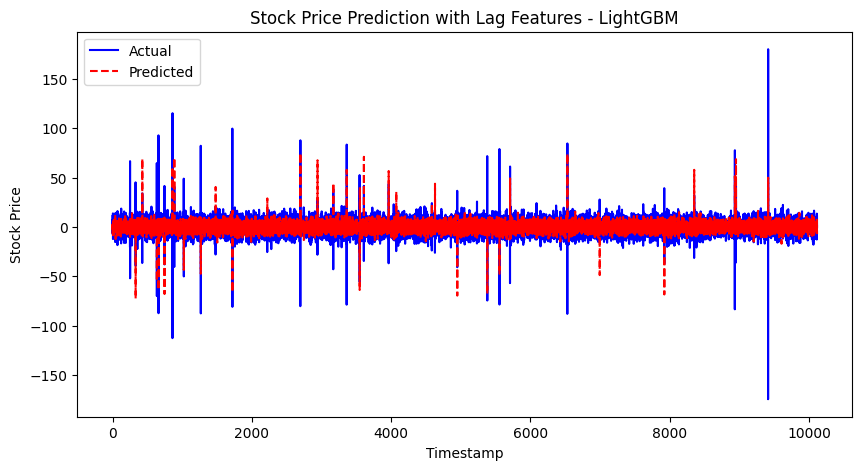

In [43]:
import lightgbm as lgb
# Function to Create Lag Features
def create_lags(data, lags=3):
    data_lagged = data.copy()
    for lag in range(1, lags + 1):
        data_lagged[f"stock_price_lag{lag}"] = data["stock_price"].shift(lag)
    return data_lagged.fillna(0).reset_index(drop=True)  # Fill NaN values with 0

# Apply Lag Feature Function
data_lagged = create_lags(data, lags=3)

# Define Features & Target
features_lgbm = [col for col in data_lagged.columns if "lag" in col]  # Use lag columns
target_lgbm = "stock_price"

X_lgbm = data_lagged[features_lgbm]
y_lgbm = data_lagged[target_lgbm]

# Train-Test Split (Time-Based)
train_size = int(len(X_lgbm) * 0.8)
X_train_lgbm, X_test_lgbm = X_lgbm.iloc[:train_size], X_lgbm.iloc[train_size:]
y_train_lgbm, y_test_lgbm = y_lgbm.iloc[:train_size], y_lgbm.iloc[train_size:]

# Train LightGBM Model
lgbm_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
lgbm_model.fit(X_train_lgbm, y_train_lgbm)

# Make Predictions
lgbm_preds = lgbm_model.predict(X_test_lgbm)

# Evaluate Model
mae_lgbm = mean_absolute_error(y_test_lgbm, lgbm_preds)
mse_lgbm = mean_squared_error(y_test_lgbm, lgbm_preds)
r2_lgbm = r2_score(y_test_lgbm, lgbm_preds)

print("LightGBM Performance:")
print(f"MAE: {mae_lgbm:.4f}")
print(f"MSE: {mse_lgbm:.4f}")
print(f"R² Score: {r2_lgbm:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10,5))
plt.plot(y_test_lgbm.values, label="Actual", color='blue')
plt.plot(lgbm_preds, label="Predicted", linestyle='dashed', color='red')
plt.legend()
plt.title("Stock Price Prediction with Lag Features - LightGBM")
plt.xlabel("Timestamp")
plt.ylabel("Stock Price")
plt.show()


# LSTM -long short term memory

Epoch 1/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - loss: 0.0126 - val_loss: 6.2258e-04
Epoch 2/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - loss: 7.2727e-04 - val_loss: 6.8823e-04
Epoch 3/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - loss: 7.3061e-04 - val_loss: 6.6331e-04
Epoch 4/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - loss: 6.8582e-04 - val_loss: 6.8663e-04
Epoch 5/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - loss: 6.8576e-04 - val_loss: 7.4145e-04
Epoch 6/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - loss: 6.9058e-04 - val_loss: 6.0065e-04
Epoch 7/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - loss: 6.6427e-04 - val_loss: 5.9005e-04
Epoch 8/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - loss: 6.4631e-04 - val_loss: 5.3261e-04
Epoch 9/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - loss: 5.8040e-04 - val_loss: 4.8535e-04
Epoch 10/50
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - loss: 5.3644e-04 - val_loss: 4.6699e-04
Epoch 11/50
1265/1265 ━

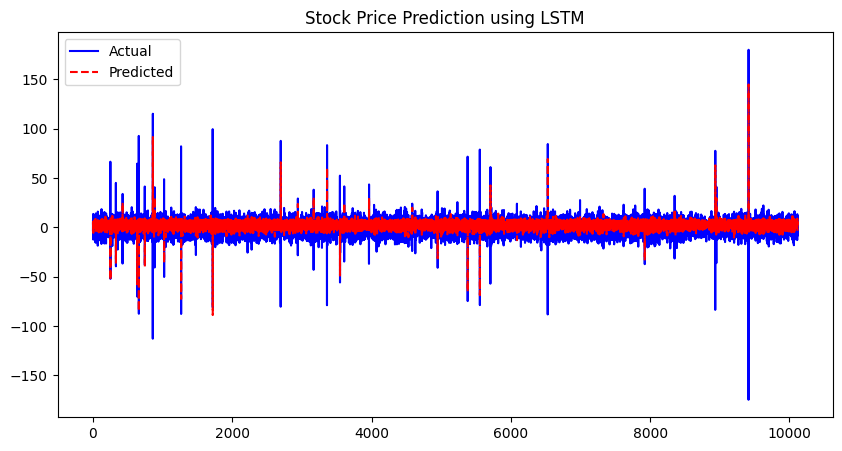

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['stock_price']])

# Convert to sequences for LSTM
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(data_scaled, time_steps)

# Split data
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict
y_pred = model.predict(X_test)

# Inverse transform to get actual values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
mape = np.mean(np.abs((y_test_actual - y_pred_actual) / y_test_actual)) * 100
r2 = r2_score(y_test_actual, y_pred_actual)

# Print Evaluation Metrics
print(f"Stock Price Prediction using LSTM")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")


# Plot results
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label="Actual", color='blue')
plt.plot(y_pred_actual, label="Predicted", color='red', linestyle='dashed')
plt.title("Stock Price Prediction using LSTM")
plt.legend()
plt.show()


# hybrid model -LSTM + Random Forest

1265/1265 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Hybrid Model - LSTM + RF
Mean Absolute Error: 4.6903
Root Mean Squared Error: 6.8515
R² Score: 0.3874


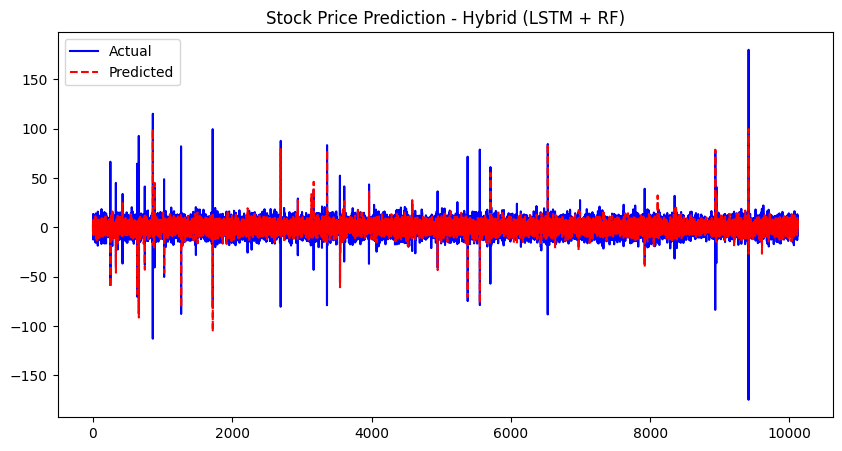

In [45]:


# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['stock_price']])

# Convert to sequences for LSTM
def create_sequences(data, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(data) - time_steps):
        X_seq.append(data[i:i+time_steps])
        y_seq.append(data[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10
X_seq_data, y_seq_target = create_sequences(data_scaled, time_steps)

# Split data
train_size = int(0.8 * len(X_seq_data))
X_lstm_train, X_lstm_test = X_seq_data[:train_size], X_seq_data[train_size:]
y_lstm_train, y_lstm_test = y_seq_target[:train_size], y_seq_target[train_size:]

# Build LSTM model for feature extraction
lstm_feature_extractor = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dense(10, activation='relu')  # This layer serves as extracted features
])

lstm_feature_extractor.compile(optimizer='adam', loss='mse')

# Train LSTM model
lstm_feature_extractor.fit(X_lstm_train, y_lstm_train, epochs=50, batch_size=32, validation_data=(X_lstm_test, y_lstm_test), verbose=0)

# Extract LSTM Features for Random Forest
X_train_hybrid_features = lstm_feature_extractor.predict(X_lstm_train)
X_test_hybrid_features = lstm_feature_extractor.predict(X_lstm_test)

# Train Random Forest using LSTM features
rf_hybrid_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_hybrid_model.fit(X_train_hybrid_features, y_lstm_train)

# Predict using RF
y_hybrid_pred = rf_hybrid_model.predict(X_test_hybrid_features)

# Inverse transform predictions
y_lstm_test_actual = scaler.inverse_transform(y_lstm_test.reshape(-1, 1))
y_hybrid_pred_actual = scaler.inverse_transform(y_hybrid_pred.reshape(-1, 1))

# Evaluate hybrid model
mae_hybrid = mean_absolute_error(y_lstm_test_actual, y_hybrid_pred_actual)
rmse_hybrid = np.sqrt(mean_squared_error(y_lstm_test_actual, y_hybrid_pred_actual))
r2_hybrid = r2_score(y_lstm_test_actual, y_hybrid_pred_actual)

print(f"Hybrid Model - LSTM + RF")
print(f"Mean Absolute Error: {mae_hybrid:.4f}")
print(f"Root Mean Squared Error: {rmse_hybrid:.4f}")
print(f"R² Score: {r2_hybrid:.4f}")

# Plot results
plt.figure(figsize=(10,5))
plt.plot(y_lstm_test_actual, label="Actual", color='blue')
plt.plot(y_hybrid_pred_actual, label="Predicted", color='red', linestyle='dashed')
plt.title("Stock Price Prediction - Hybrid (LSTM + RF)")
plt.legend()
plt.show()


In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dictionary to store results
evaluation_results = {
    "Model": [],
    "RMSE": [],
    "MAE": [],
    "R² Score": []
}

# Function to evaluate models and store results
def evaluate_model(model_name, y_true, y_pred):
    evaluation_results["Model"].append(model_name)
    evaluation_results["RMSE"].append(np.sqrt(mean_squared_error(y_true, y_pred)))  # Root Mean Squared Error
    evaluation_results["MAE"].append(mean_absolute_error(y_true, y_pred))  # Mean Absolute Error
    evaluation_results["R² Score"].append(r2_score(y_true, y_pred))  # R² Score

# Evaluate ARIMA
evaluate_model("ARIMA", test, forecast)

# Evaluate Random Forest
evaluate_model("Random Forest", y_test_rf, y_pred_rf)

# Evaluate XGBoost
evaluate_model("XGBoost",y_test_xgb, xgb_preds)

# Evaluate LightGBM
evaluate_model("LightGBM",y_test_lgbm,lgbm_preds)

# Evaluate LSTM
evaluate_model("LSTM", y_test_actual.flatten(), y_pred_actual.flatten())  # Ensure proper shape

# Evaluate Hybrid (LSTM + RF)
evaluate_model("Hybrid (LSTM + RF)", y_lstm_test_actual.flatten(), y_hybrid_pred_actual.flatten())

# Convert to DataFrame
df_results = pd.DataFrame(evaluation_results)

# Display results
print("\nOverall Model Performance:")
print(df_results)

# Select the best model based on RMSE (Lower is better)
best_model = df_results.loc[df_results["RMSE"].idxmin()]
print("\nBest Performing Model:")
print(best_model)  



Overall Model Performance:
                Model      RMSE       MAE  R² Score
0               ARIMA  8.859689  6.002924 -0.024345
1       Random Forest  7.099839  4.922214  0.342181
2             XGBoost  7.053133  4.721190  0.350807
3            LightGBM  7.030813  4.707985  0.354910
4                LSTM  7.313405  5.190002  0.302011
5  Hybrid (LSTM + RF)  6.851489  4.690311  0.387397

Best Performing Model:
Model       Hybrid (LSTM + RF)
RMSE                  6.851489
MAE                   4.690311
R² Score              0.387397
Name: 5, dtype: object
